## Classification Project for Social Network Ads dataset Using Decision Tree Algorithm


#### Problem Statment: We want to determine if the customer will buy or not through his attributes

#### Data: This dataset contains information about users who clicked online ad and whether they purchased product or not, and we got it from kaggle https://www.kaggle.com/datasets/rakeshrau/social-network-ads/data

##### Dataset contains following attributes:
* User ID - Unique ID
* Gender - categorical variable
* Age - numeric variable
* EstimatedSalary - numeric variable
* Purchased - target binary variable(0 >> not purchased , 1 >> purchased)

##### Machine Learing algorithm: We will use DecisionTreeClassifier

#### Project Steps:
* Load packages that we will use 
* Load and Inspect Data
* Make EDA to discover more about data
* Data Preprocessing to prepare data for modeling
* Hyper parmeter tuning using RandomizedSearchCV to detrmine best parmeters for our model
* Build our model using DecisionTreeClassifier
* Evaluate The Model using siket-learn metrics like classification_report,confusion_matrix,score

***Let's Start***

### Import Packages 

In [1]:
## Data manpulation and analysis packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import Model and Metrics for evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
## for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV 
## to avoid code warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load & Inspect Data

In [2]:
# Read Data
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Inspect first 5 rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# read the shape of data frame
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
## Check missing values
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Check Duplicates**

In [7]:
df.duplicated().sum()

0

In [8]:
df['User ID'].nunique()

400

In [9]:
df.drop('User ID',inplace=True,axis=1)

## EDA

In [10]:
df.drop('Purchased',axis=1).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.66,10.48,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.50,34096.96,15000.0,43000.00,70000.0,88000.0,150000.0


In [11]:
df.groupby('Purchased')['Age','EstimatedSalary'].mean().round(2).T

Purchased,0,1
Age,32.79,46.39
EstimatedSalary,60544.75,86272.73


In [12]:
pd.crosstab(df['Gender'],df['Purchased'])

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [ ]:
sns.pairplot(df,hue='Purchased')

In [13]:
# discover more about gender
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

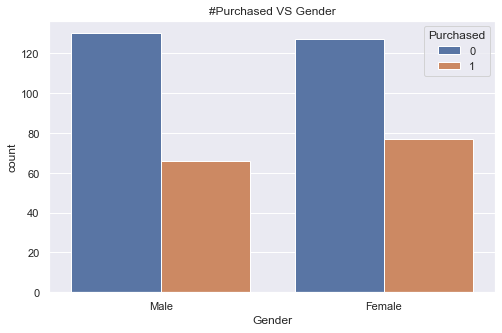

In [14]:
## Let's See #Purchased VS Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Gender',hue='Purchased')
plt.title('#Purchased VS Gender')
plt.show()

In [15]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Text(0.5, 1.0, 'Purchased_1 VS Purchased_0')

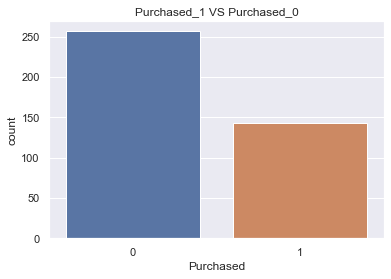

In [16]:
sns.countplot(data=df,x='Purchased')
plt.title('Purchased_1 VS Purchased_0')

**Let's Discover more about data with some plots**

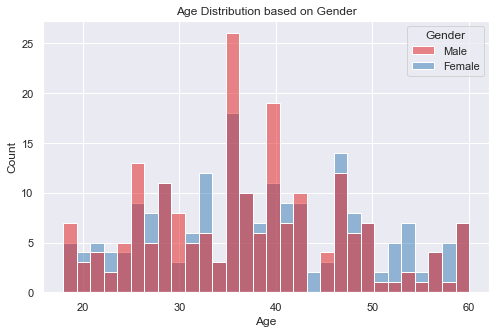

In [17]:
plt.figure(figsize=(8,5))
plt.title('Age Distribution based on Gender')
sns.histplot(data=df,x='Age',hue='Gender',palette='Set1',bins=30)
plt.show()

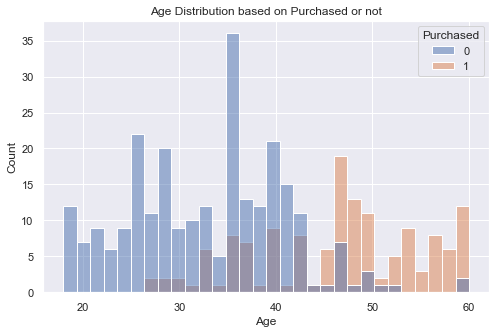

In [18]:
plt.figure(figsize=(8,5))
plt.title('Age Distribution based on Purchased or not')
sns.histplot(data=df,x='Age',hue='Purchased',bins=30)
plt.show()

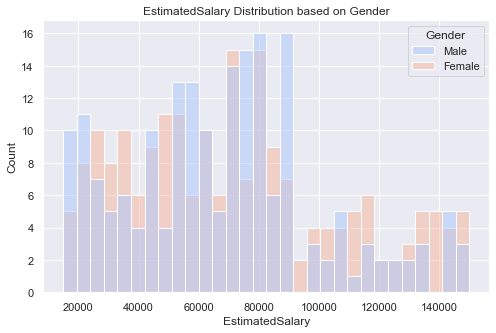

In [19]:
plt.figure(figsize=(8,5))
plt.title('EstimatedSalary Distribution based on Gender')
sns.histplot(data=df,x='EstimatedSalary',hue='Gender',palette='coolwarm',bins=30)
plt.show()

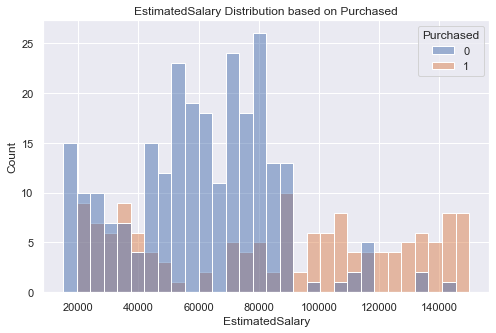

In [20]:
plt.figure(figsize=(8,5))
plt.title('EstimatedSalary Distribution based on Purchased')
sns.histplot(data=df,x='EstimatedSalary',hue='Purchased',bins=30)
plt.show()

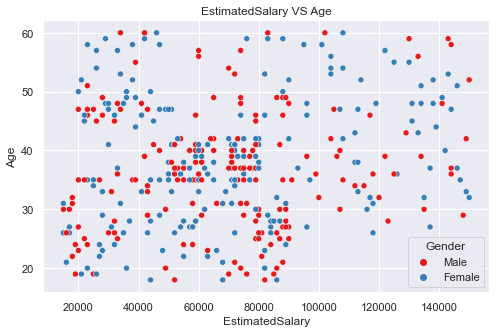

In [21]:
plt.figure(figsize=(8,5))
plt.title('EstimatedSalary VS Age')
sns.scatterplot(data=df,x='EstimatedSalary',y='Age',hue='Gender',palette='Set1')
plt.show()

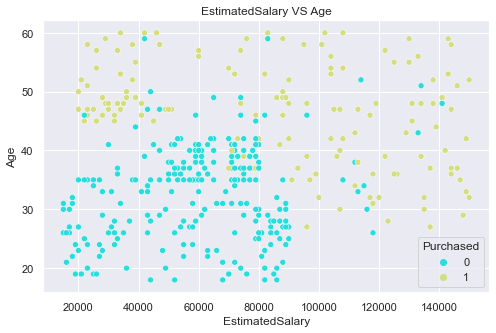

In [22]:
plt.figure(figsize=(8,5))
plt.title('EstimatedSalary VS Age')
sns.scatterplot(data=df,x='EstimatedSalary',y='Age',hue='Purchased',palette='rainbow')
plt.show()

In [23]:
# Get the relation between variables
corr = df.corr().round(3)
corr

,Age,EstimatedSalary,Purchased
Age,1.000,0.155,0.622
EstimatedSalary,0.155,1.000,0.362
Purchased,0.622,0.362,1.000


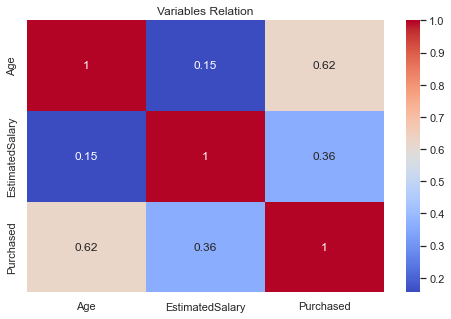

In [24]:
# Let's plot it
plt.figure(figsize=(8,5))
plt.title('Variables Relation')
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### Data Preprocessing

In [25]:
# transform gender to 0,1 (Encoding)
df_gender = pd.get_dummies(df['Gender'],drop_first=True)

In [26]:
# Merge the 2 dataframes 
df = pd.concat([df_gender,df],axis=1)

In [28]:
# remove gender column
df.drop('Gender',axis=1,inplace=True)

In [29]:
# 1 -> male
# 0 -> female
df.head(10)

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


### Model Building & Training

In [30]:
X = df.drop('Purchased',axis=1) # -> features
y = df['Purchased'] # -> target

In [31]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
## Hyperparam tuning using RandomizedSearchCV

DT_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rs_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=DT_grid, n_iter=20, cv=5, verbose=True)
rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [33]:
rs_dt.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'criterion': 'entropy'}

In [34]:
# Build The Model with the best parameters
dt_model = DecisionTreeClassifier(
    splitter='best',
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=50,
    criterion='entropy'
)

In [35]:
# fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=10)

In [36]:
# make predictions
pred = dt_model.predict(X_test)

In [37]:
pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [38]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
60     0
79     0
285    1
305    0
281    0
Name: Purchased, Length: 120, dtype: int64

### Model Evaluation 

In [39]:
accuracy = dt_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.925


In [40]:
print(classification_report(y_test,pred))
print('----------------------------------------------------')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.91      0.89      0.90        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120

----------------------------------------------------
[[69  4]
 [ 5 42]]


In [42]:
# ## Let's test our model by hand

gender = float(input("Enter value for gender: "))
age = float(input("Enter value for age: "))
estimated_salary = float(input("Enter value for salary: "))

# Create a new data point
new_data = [[gender, age, estimated_salary]]

# Make predictions on the new data
predicted_class = dt_model.predict(new_data)

print(f"The predicted class is: {predicted_class}")

Enter value for gender: 2
Enter value for age: 4
Enter value for salary: 555555
The predicted class is: [1]


## 